In [1]:
import pandas as pd
import os

In [2]:
os.chdir('/Users/kruto/Desktop/мо/лабраб11')

In [251]:
n = ['age', 'workclass', 'fnlwgt','education', 'education-nim','marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data',  names = n)

df1 = pd.read_csv('adult.test', names = n)

In [252]:
df.head()

,age,workclass,fnlwgt,education,education-nim,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Рассматриваем данные

In [253]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-nim     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [254]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-nim      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [255]:
df.info() ## нигде нет missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-nim   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [256]:
import numpy as np
df[df == ' ?'] = np.nan

/Users/kruto/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-nim   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [258]:
# теперь видим, что много вопросов вnative-country, occupation, workclass

In [259]:
def missing_values(x):
    return sum(x==' ?') #вопрос с пробелом 
df.apply(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education-nim     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [260]:
# все чисто

In [261]:
temp = df['income']

In [262]:
temp[300] # с пробелом 

' >50K'

In [263]:
# преобразуем данные, которые предсказываем
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
df.head()

,age,workclass,fnlwgt,education,education-nim,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Проанализируем данные с помощью визуализации

In [264]:
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']

cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-county']

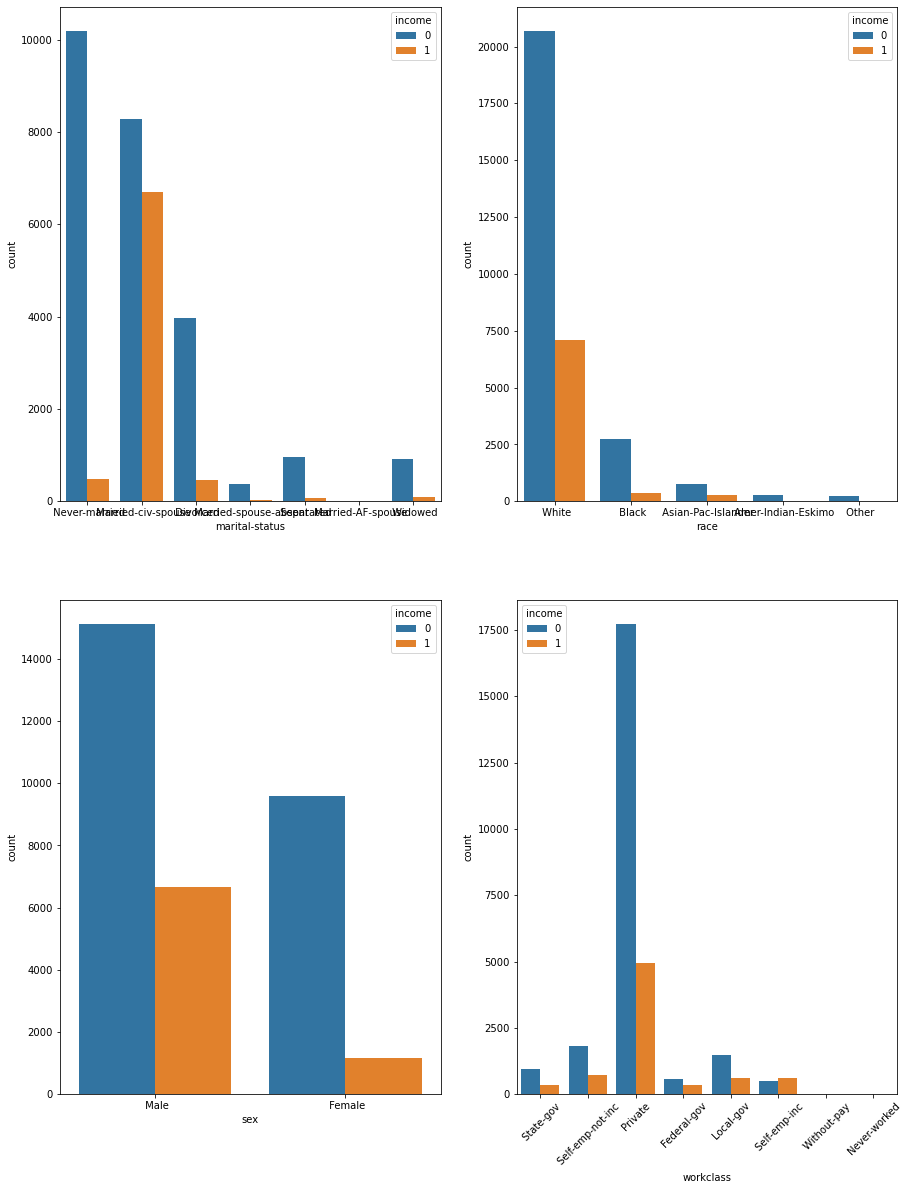

In [265]:
# численные значения
import seaborn as sns
import matplotlib.pyplot as plt

fig, ((c,d),(e,f)) = plt.subplots(2,2,figsize = (15,20))
plt.xticks(rotation = 45)

sns.countplot(df['workclass'], hue=df['income'], ax=f)
#sns.countplot(df['relationship'], hue=df['income'], ax=b)
sns.countplot(df['marital-status'], hue=df['income'], ax=c)
sns.countplot(df['race'],hue=df['income'], ax=d)
sns.countplot(df['sex'],hue=df['income'], ax=e)
#sns.countplot(df['native-country'],hue=df['income'],ax=a)

In [266]:
pd.value_counts(df['native-country'])
# можем разделить 

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

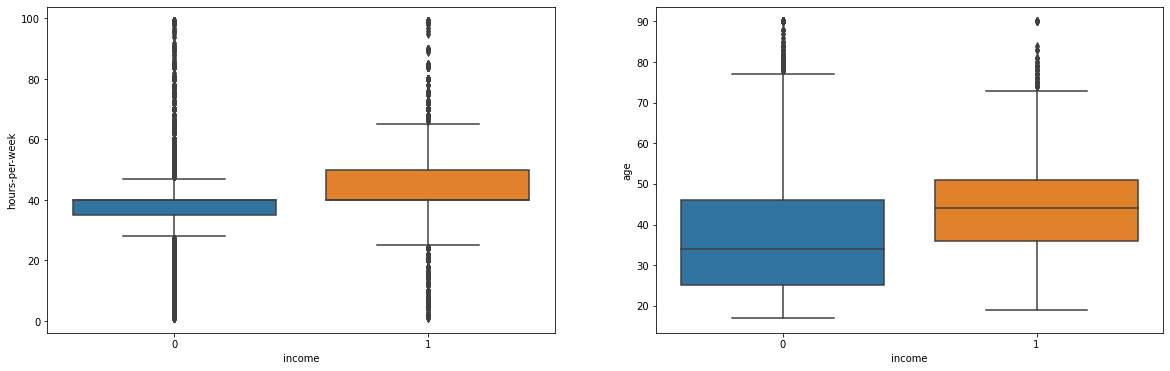

In [267]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours-per-week',x='income',data=df,ax=a)
sns.boxplot(y='age',x='income',data=df,ax=b)

In [268]:
## Видим, что в среднем доход у людей больше 50к

In [269]:
## дальше работаем с null данными

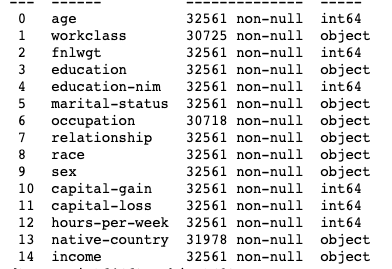

In [270]:
df['workclass'].describe()

count        30725
unique           8
top        Private
freq         22696
Name: workclass, dtype: object

In [271]:
# заполняем с наиболее часто встречающимся значением
df['workclass'] = df['workclass'].fillna('Private')

In [272]:
df['occupation'].describe()

count               30718
unique                 14
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

In [273]:
df['occupation'] = df['occupation'].fillna('Prof-specialty')

In [274]:
df['native-country'].describe()

count              31978
unique                41
top        United-States
freq               29170
Name: native-country, dtype: object

In [275]:
df['native-country'] = df['native-country'].fillna('United-States')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-nim   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2097e4fd0>,
      dtype=object)

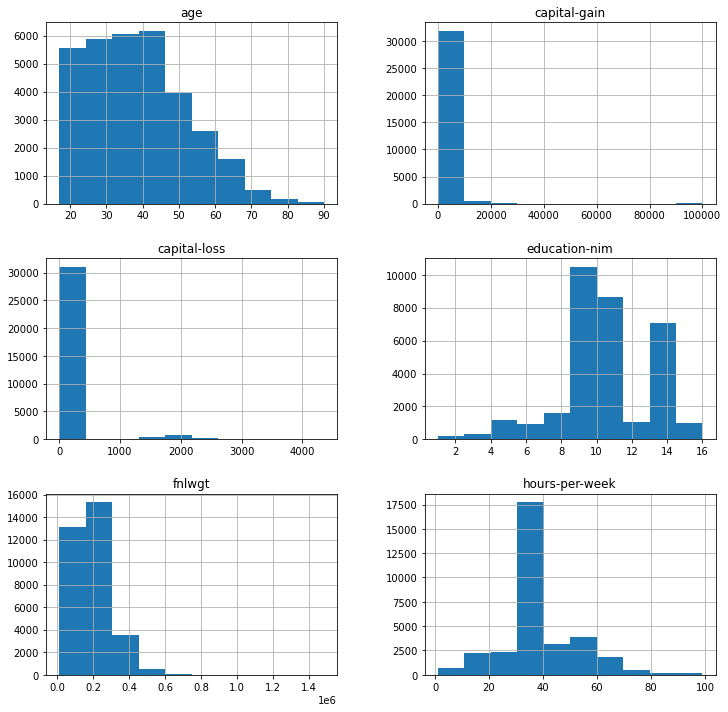

In [277]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

rcParams['figure.figsize'] = 12, 12
df[['age', 'fnlwgt', 'education-nim', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

In [278]:
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']

cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [279]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [288]:
df.head()

,age,workclass,fnlwgt,education,education-nim,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4,0


In [298]:
from sklearn.model_selection import train_test_split

X = df.drop(['income'], axis=1)
Y = df['income']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 25)

In [299]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain = pd.DataFrame(scaler.fit_transform(xtrain), columns = X.columns)

xtest = pd.DataFrame(scaler.transform(xtest), columns = X.columns)

In [300]:
xtrain.head()


,age,workclass,fnlwgt,education,education-nim,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.996542,-0.232888,1.683515,-0.331541,1.134587,0.923696,-0.790512,-0.279665,-1.956093,-1.420303,-0.279297,-0.205368,-0.198030,0.2522
1,1.360223,-0.232888,0.545776,-0.331541,1.134587,-0.408480,0.597444,-0.900540,0.396167,0.704075,1.855834,-0.205368,0.790575,0.2522
2,-0.849244,-0.232888,0.096729,-0.588795,0.359001,0.923696,-0.790512,0.962084,0.396167,0.704075,-0.279297,-0.205368,-0.033263,0.2522
3,-0.922893,1.032105,0.968544,-0.331541,1.134587,-1.740656,1.060096,-0.279665,0.396167,0.704075,-0.279297,-0.205368,-0.033263,0.2522
4,-0.260053,-0.232888,1.765160,0.182965,-0.416586,-0.408480,-0.096534,-0.900540,-1.956093,0.704075,-0.279297,-0.205368,-0.033263,0.2522


In [301]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(xtrain, ytrain)

y_pred = random_forest.predict(xtest)


In [292]:
print(random_forest.score(xtest, ytest))

0.8602794411177644


In [293]:
accuracy_score(ytest, y_pred)

0.8602794411177644

In [295]:
f1_score(ytest, y_pred)

0.6885694729637235

In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [218]:
param_grid = { 
    'n_estimators': [3, 5,7,9,12],
    'max_depth' : [4,5,7,10],
    'min_samples_split': range(2, 5,1)
}

In [219]:
grid = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5)
grid.fit(xtrain, ytrain)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=4, n_estimators=200),
             param_grid={'max_depth': [4, 5, 7, 10],
                         'min_samples_split': range(2, 5),
                         'n_estimators': [3, 5, 7, 9, 12]})

In [220]:
grid.best_params_

{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 7}

In [223]:
grid.best_score_

0.858415469460984

In [225]:
rf_1 = RandomForestClassifier(random_state=42, n_estimators= 7, max_depth=10, min_samples_split= 3, criterion='gini')

In [226]:
rf_1.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=7,
                       random_state=42)

In [227]:
pred = rf_1.predict(xtest)

In [228]:
accuracy_score(ytest, pred)

0.8595117457392907

In [229]:
from sklearn.metrics import f1_score

In [230]:
f1_score(pred,ytest)

0.6644664466446646

In [306]:
from sklearn.metrics import roc_curve, auc

roc_curve(ytest, pred)

(array([0.   , 0.176, 1.   ]),
 array([0.        , 0.18241904, 1.        ]),
 array([2, 1, 0]))

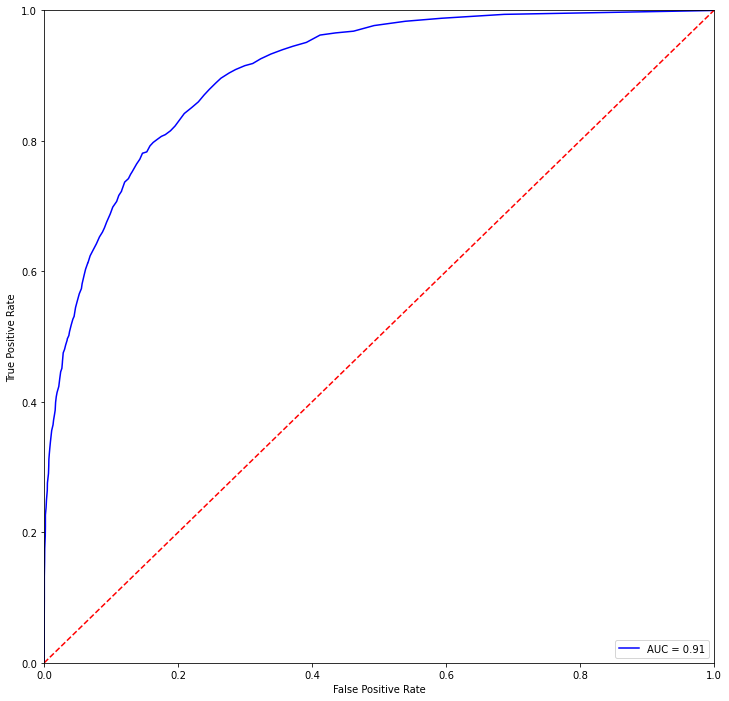

In [313]:
import sklearn.metrics as metrics

probs = random_forest.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [309]:
from sklearn.linear_model import LogisticRegression

In [310]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtest)

In [311]:
accuracy_score(ytest, lr_pred)

0.831874712114233

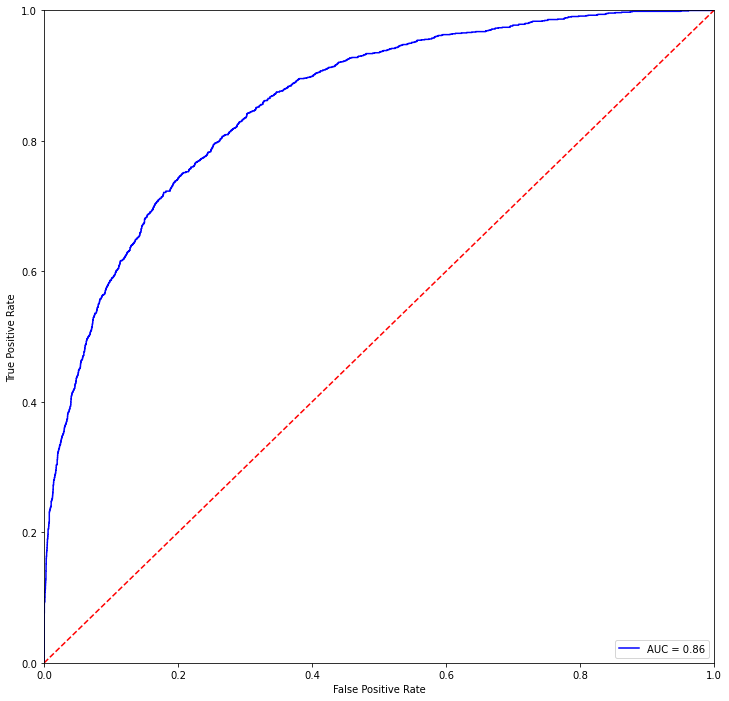

In [314]:
probs = lr.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
